In [1]:
import os

In [2]:
print(os.getcwd())

C:\Users\de'l'l\Desktop\Python


In [3]:
import pandas as pd
import numpy as np

In [4]:
df_women = pd.read_csv("inputData/women.csv",index_col=0)

In [5]:
df_women.head()

,height,weight
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126


In [6]:
df_women.shape

(15, 2)

In [7]:
df_women.columns

Index(['height', 'weight'], dtype='object')

In [8]:
df_women.describe()

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

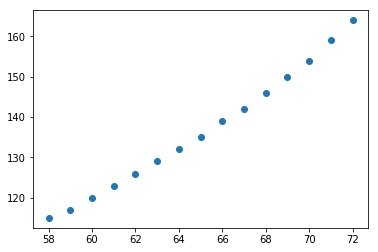

In [11]:
plt.scatter(df_women["height"],df_women["weight"])
plt.show()

In [12]:
X = df_women["height"]

In [15]:
y = df_women["weight"]

In [16]:
X

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: height, dtype: int64

In [17]:
y

1     115
2     117
3     120
4     123
5     126
6     129
7     132
8     135
9     139
10    142
11    146
12    150
13    154
14    159
15    164
Name: weight, dtype: int64

In [18]:
import statsmodels.api as sm

In [19]:
X_add_const = sm.add_constant(X)

In [20]:
X_add_const

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [21]:
myModel = sm.OLS(y,X_add_const)

In [22]:
result = myModel.fit()

In [25]:
reslut.summary()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           1.09e-14
Time:                        13:51:52   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.000    -100.343     -74.691
height         3.4500      0.091     37.855      0.000       3.253       3.647
==============================================================================
Omnibus:                        2.396   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.660
Skew:                           0.789   Prob(JB):                        0.436
Kurtosis:                       2.596   Cond. No.                         982.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
reslut.params

const    -87.516667
height     3.450000
dtype: float64

In [27]:
reslut.rsquared

0.9910098326857505

In [28]:
reslut.f_pvalue

1.0909729585997859e-14

In [29]:
sm.stats.stattools.durbin_watson(reslut.resid)

0.3153803748621806

In [31]:
sm.stats.stattools.jarque_bera(reslut.resid)

(1.6595730644309838, 0.4361423787323849, 0.7893583826332282, 2.596304225738997)

In [33]:
y_predict = reslut.predict()

In [34]:
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

In [35]:
plt.rcParams["font.family"] = "simHei"

Text(0,0.5,'体重')

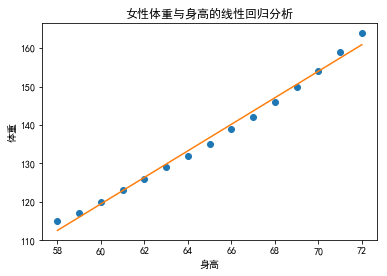

In [36]:
plt.plot(df_women["height"],df_women["weight"],"o")
plt.plot(df_women["height"],y_predict)
plt.title("女性体重与身高的线性回归分析")
plt.xlabel("身高")
plt.ylabel("体重")

In [38]:
X = np.column_stack((X,np.power(X,2),np.power(X,3)))

In [ ]:
X_add_c